In [2]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 711.8 kB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 156.7 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

df = pd.read_csv('apps.csv')

print("\nFirst few rows:")
df.head()


First few rows:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [4]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Cleaned_App_Name'] = df['App'].apply(clean_text)

In [5]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_Score'] = df['Cleaned_App_Name'].apply(get_sentiment)

def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Score'].apply(categorize_sentiment)

In [6]:
print("Sentiment Distribution:")
print(df['Sentiment'].value_counts())

print("\nExamples of each sentiment:")
for sentiment in ['Positive', 'Neutral', 'Negative']:
    examples = df[df['Sentiment'] == sentiment]['App'].head(3).tolist()
    print(f"{sentiment}: {examples}")

Sentiment Distribution:
Sentiment
Neutral     8109
Positive    1281
Negative     269
Name: count, dtype: int64

Examples of each sentiment:
Positive: ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'Kids Paint Free - Drawing Fun', 'Easy Realistic Drawing Tutorial']
Neutral: ['Photo Editor & Candy Camera & Grid & ScrapBook', 'Coloring book moana', 'Sketch - Draw & Paint']
Negative: ['Logo Maker - Small Business', 'Sad Poetry Photo Frames 2018', 'Little Teddy Bear Colouring Book Game']


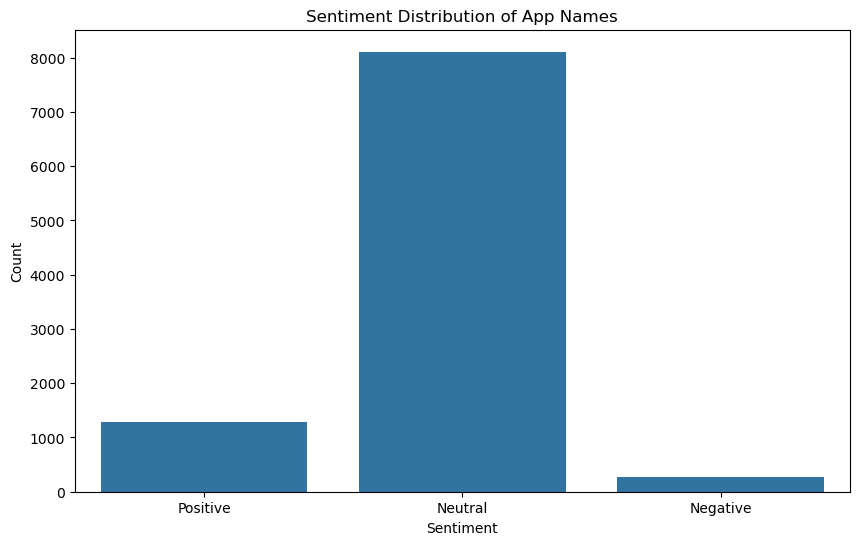

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of App Names')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

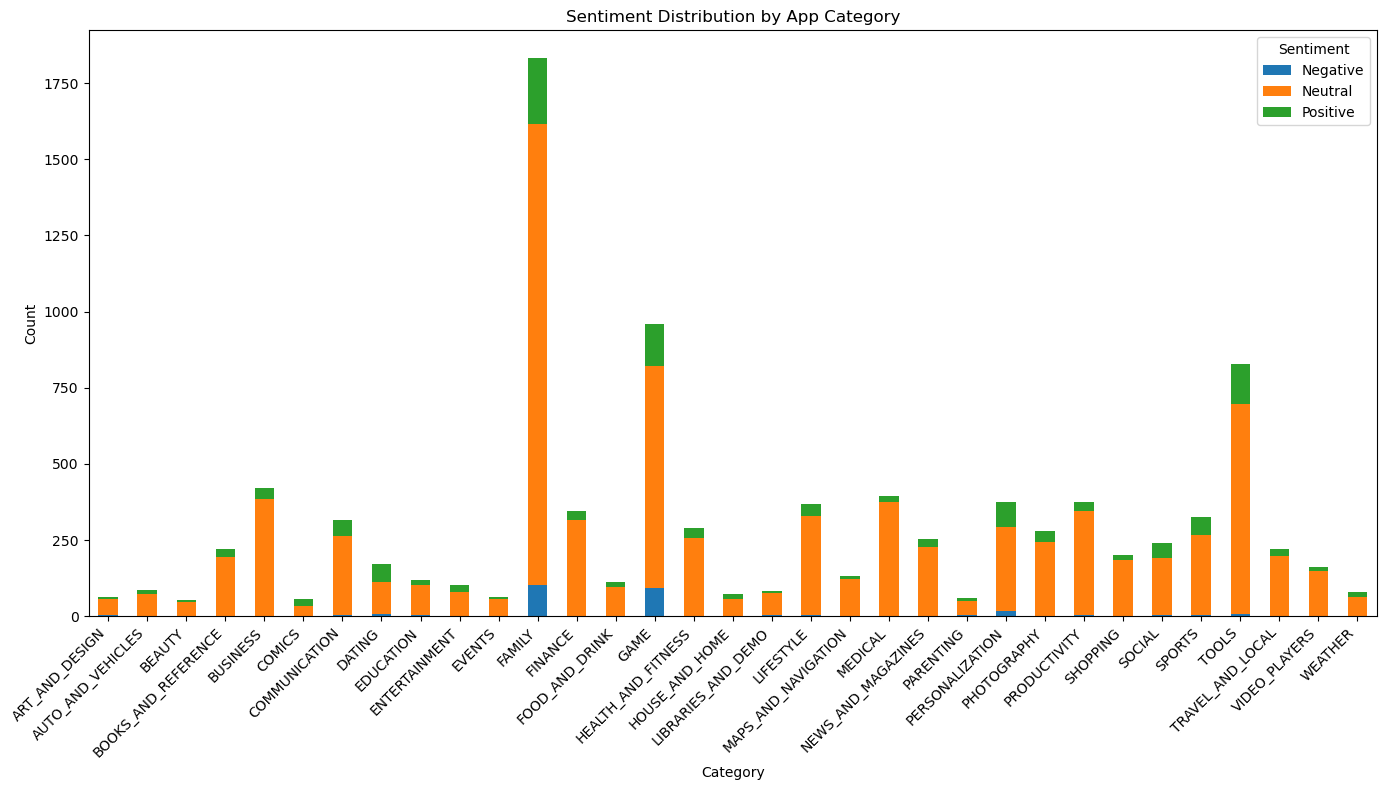

In [8]:
plt.figure(figsize=(12, 8))
sentiment_by_category = df.groupby(['Category', 'Sentiment']).size().unstack().fillna(0)
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Sentiment Distribution by App Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

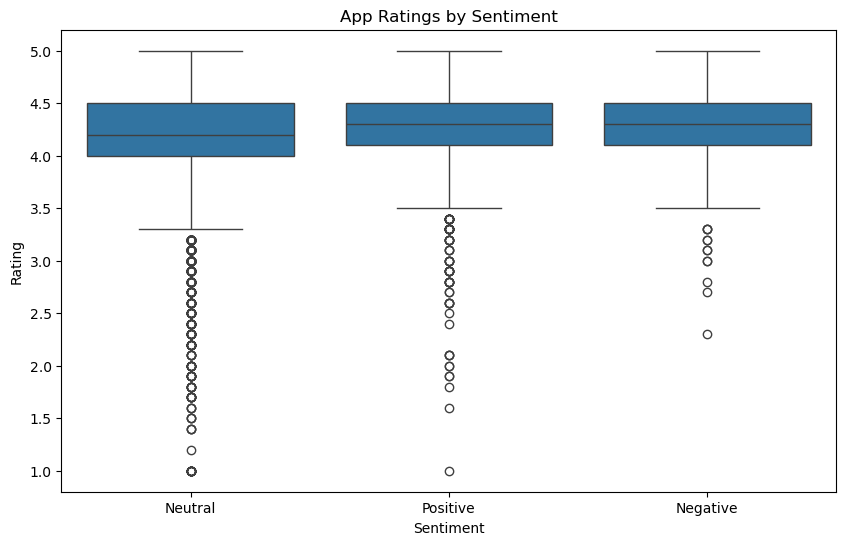

Average Rating by Sentiment:
Sentiment
Negative    4.234541
Neutral     4.166528
Positive    4.202877
Name: Rating, dtype: float64


In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title('App Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

avg_rating_by_sentiment = df.groupby('Sentiment')['Rating'].mean()
print("Average Rating by Sentiment:")
print(avg_rating_by_sentiment)

In [10]:
most_positive = df.nlargest(10, 'Sentiment_Score')[['App', 'Sentiment_Score', 'Rating', 'Category']]
print("Top 10 Most Positive App Names:")
print(most_positive)

most_negative = df.nsmallest(10, 'Sentiment_Score')[['App', 'Sentiment_Score', 'Rating', 'Category']]
print("\nTop 10 Most Negative App Names:")
print(most_negative)

Top 10 Most Positive App Names:
                                                    App  Sentiment_Score  \
78                                  Best Car Wallpapers              1.0   
86                                      BEST CAR SOUNDS              1.0   
268                      Manga Rock - Best Manga Reader              1.0   
287              Manga Mania - Best online manga reader              1.0   
294                                      Perfect Viewer              1.0   
295         Best Wallpapers Backgrounds(100,000+ 4K HD)              1.0   
958                                   Delicious Recipes              1.0   
1117  Best Ovulation Tracker Fertility Calendar App ...              1.0   
1142                              10 Best Foods for You              1.0   
1526                                     Dude Perfect 2              1.0   

      Rating            Category  
78       4.5   AUTO_AND_VEHICLES  
86       4.3   AUTO_AND_VEHICLES  
268      4.4              

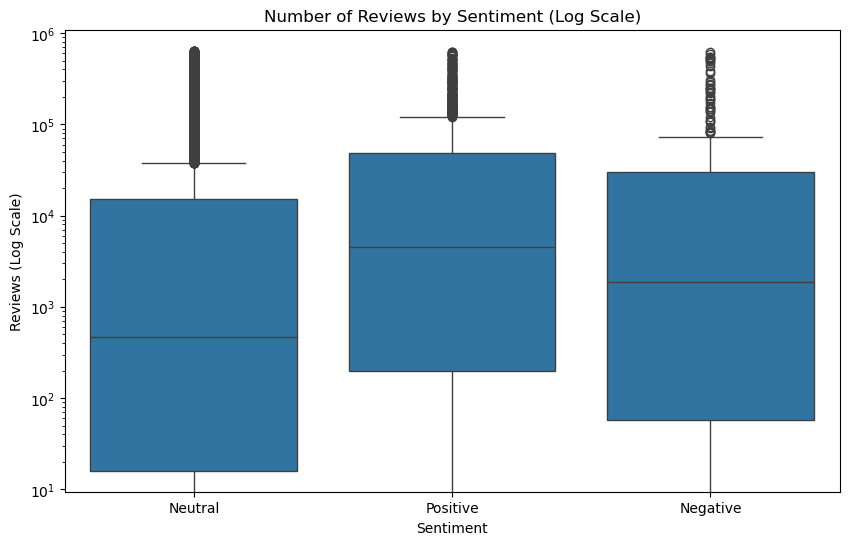

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Reviews', data=df[df['Reviews'] < df['Reviews'].quantile(0.95)]) 
plt.yscale('log') 
plt.title('Number of Reviews by Sentiment (Log Scale)')
plt.xlabel('Sentiment')
plt.ylabel('Reviews (Log Scale)')
plt.show()

In [14]:
df.to_csv('apps_with_sentiment.csv', index=False)
print("Results saved to 'apps_with_sentiment.csv'")

Results saved to 'apps_with_sentiment.csv'
